In [ ]:
import pandas as pd

df = pd.read_csv("/content/companies.csv")
print(df.head())

        id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Company      10001        NaN   

                 name     normalized_name                    permalink  \
0            Wetpaint            wetpaint            /company/wetpaint   
1             Flektor             flektor             /company/flektor   
2               There               there               /company/there   
3             MYWEBBO             mywebbo             /company/mywebbo   
4  THE Movie Streamer  the movie streamer  /company/the-movie-streamer   

     category_code     status  ... first_milestone_at last_milestone_at  \
0              web  operating  ...         2010-09-05        2013-09-18   
1      games_video   acquired  .

In [ ]:
# Summary statistics of numerical columns
print(df.describe())

# Information about the dataset
print(df.info())

        Unnamed: 0.1      entity_id  parent_id     logo_width    logo_height  \
count  196553.000000  196553.000000        0.0  110110.000000  110110.000000   
mean    98276.000000  153006.227333        NaN     459.132685     222.728917   
std     56740.108067   90209.250941        NaN     594.982577     333.090722   
min         0.000000       1.000000        NaN       1.000000       1.000000   
25%     49138.000000   59850.000000        NaN     192.000000      70.000000   
50%     98276.000000  174539.000000        NaN     267.000000     105.000000   
75%    147414.000000  232655.000000        NaN     484.000000     232.000000   
max    196552.000000  286215.000000        NaN   18200.000000    9600.000000   

       investment_rounds  invested_companies  funding_rounds  \
count        2591.000000         2591.000000    31707.000000   
mean            2.372057            2.204940        1.659760   
std            12.173510           11.436955        1.201666   
min             1.00000

In [ ]:
# Check for missing values
print(df.isnull().sum())


id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [ ]:
# Importing pandas
import pandas as pd

# Filling missing values with mean for numerical columns
numerical_cols = ['logo_width', 'logo_height', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'ROI']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Filling missing values with mode for categorical columns
categorical_cols = ['name', 'normalized_name', 'category_code', 'country_code', 'state_code', 'city']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Dropping columns with a high percentage of missing values
threshold = 0.7
df = df.dropna(thresh=threshold*len(df), axis=1)

# Dropping rows with any remaining missing values
df = df.dropna()

# Checking for missing values after imputation
print(df.isnull().sum())


id                    0
Unnamed: 0.1          0
entity_type           0
entity_id             0
name                  0
normalized_name       0
permalink             0
category_code         0
status                0
logo_width            0
logo_height           0
country_code          0
state_code            0
city                  0
region                0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_by            0
created_at            0
updated_at            0
lat                   0
lng                   0
ROI                   0
dtype: int64


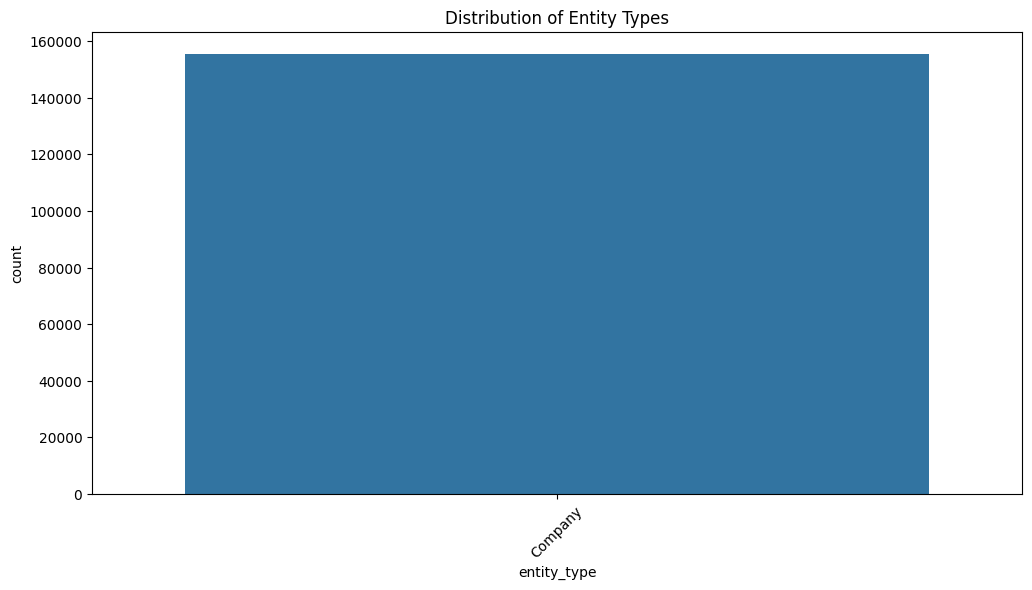

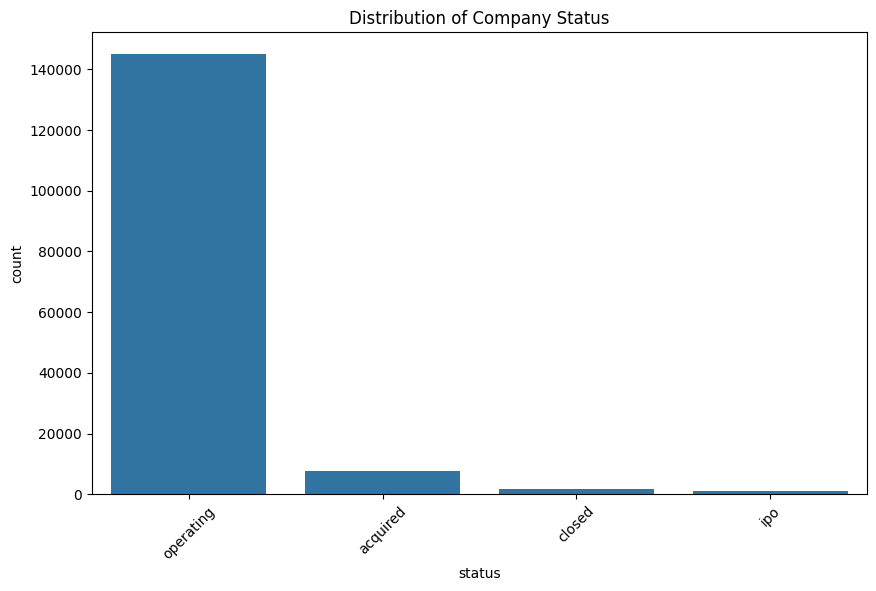

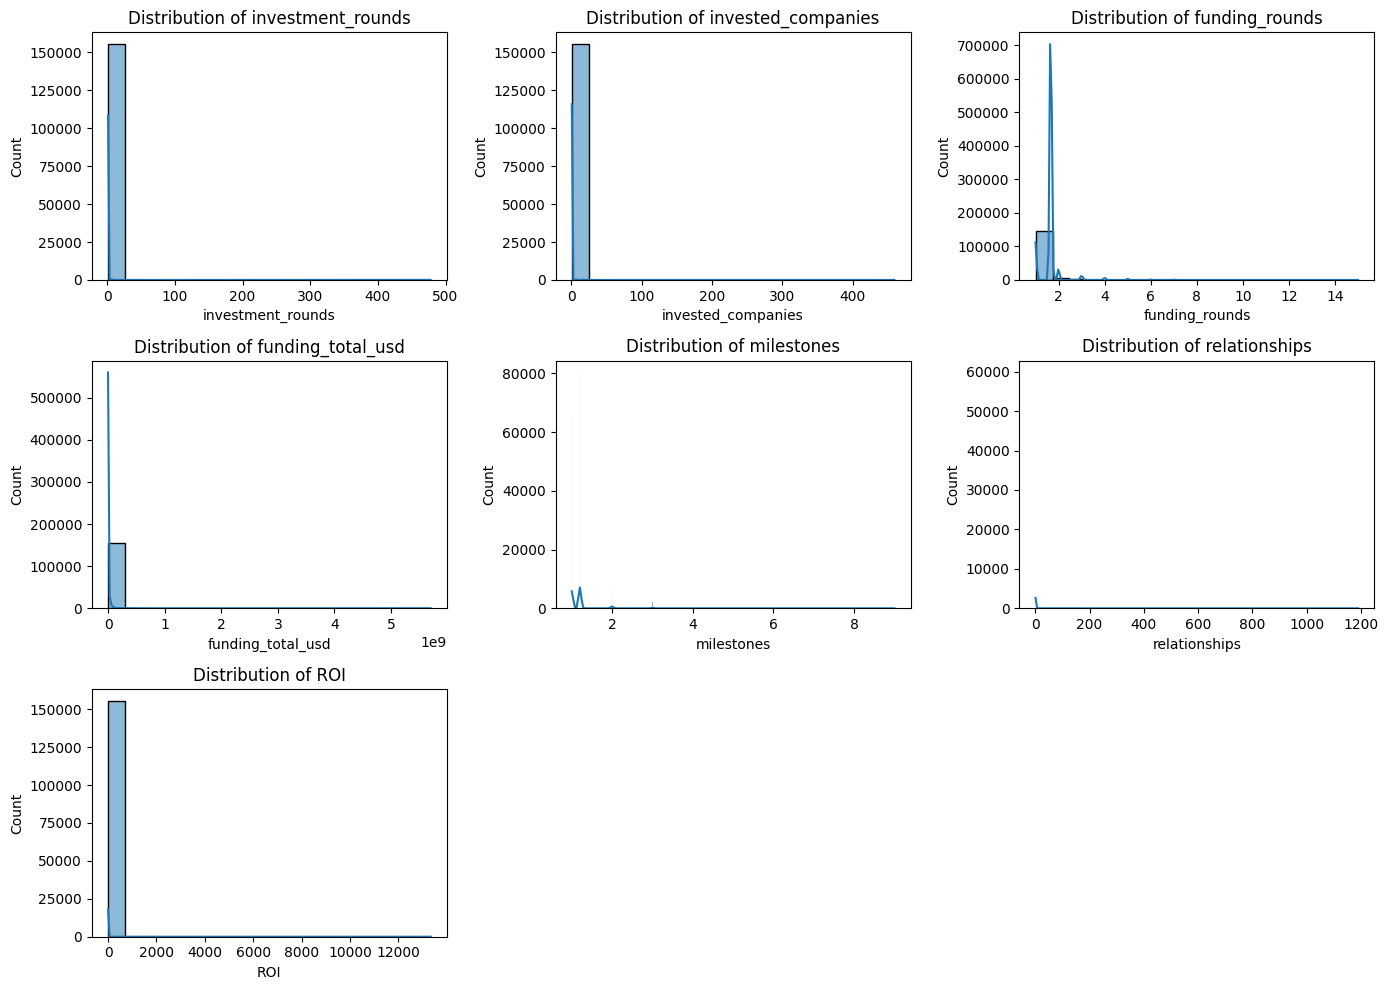

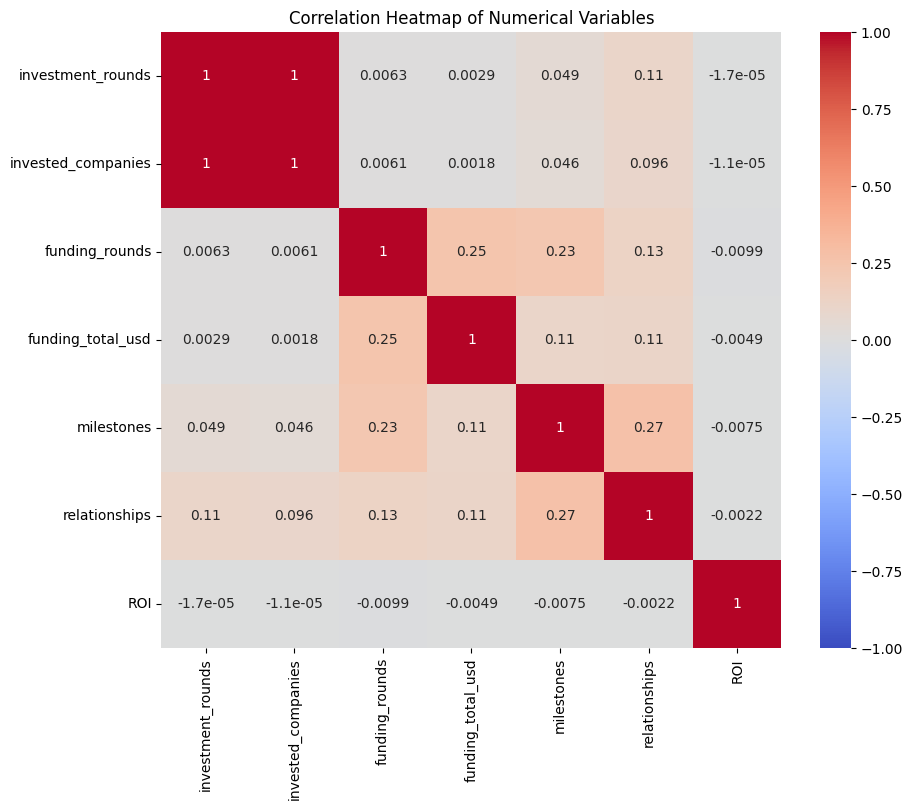

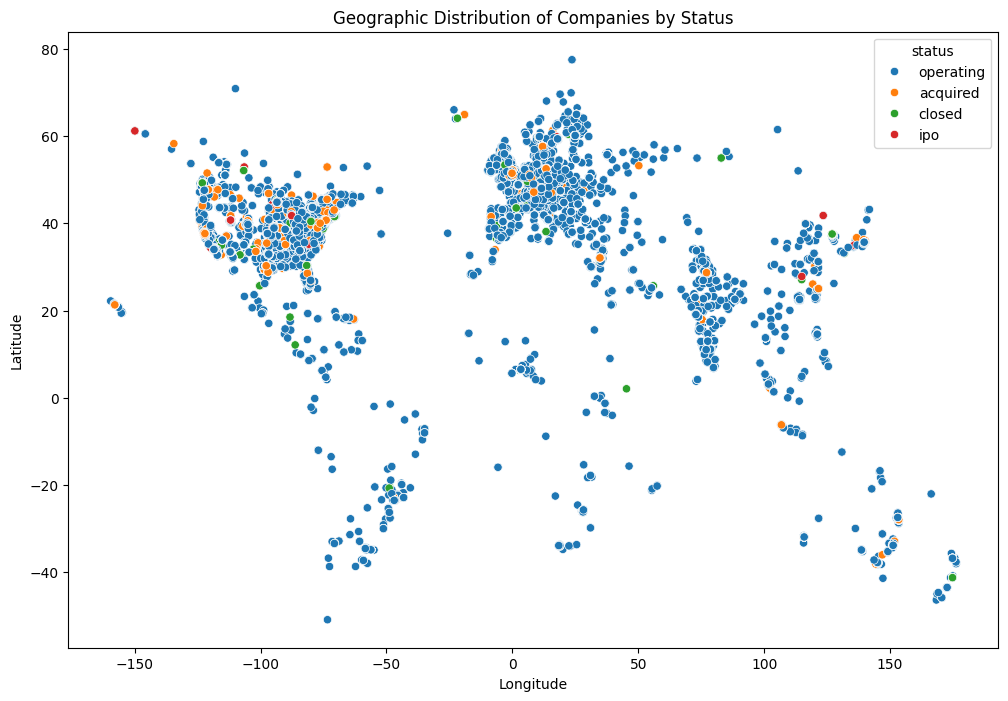

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='entity_type', data=df)
plt.title('Distribution of Entity Types')
plt.xticks(rotation=45)
plt.show()

# Distribution of status
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df)
plt.title('Distribution of Company Status')
plt.xticks(rotation=45)
plt.show()

# Distribution of numerical variables
num_cols = ['investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'ROI']

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Geographic visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lng', y='lat', hue='status', data=df)
plt.title('Geographic Distribution of Companies by Status')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# Print the list of columns in the DataFrame
print(df.columns)


Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'logo_width',
       'logo_height', 'country_code', 'state_code', 'city', 'region',
       'investment_rounds', 'invested_companies', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['entity_type', 'category_code', 'country_code', 'state_code'], drop_first=True)

# Assuming 'status' is the target variable
target_variable = 'status'

# Define target variable
y = df[target_variable]

# Label encode target variable for classification
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
